# Logistic Regression

In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

seed = 6

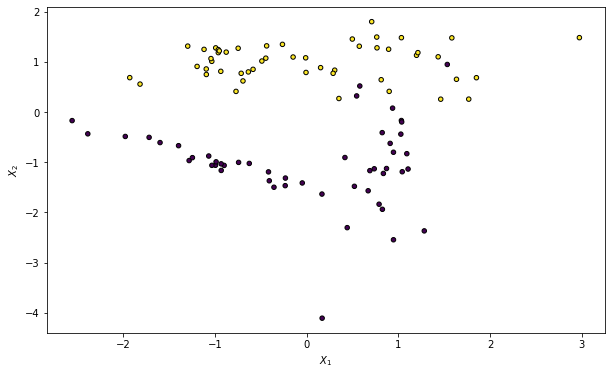

In [21]:
X, y = make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=seed
)

fig, ax = plt.subplots(1,1,figsize=(10, 6))
ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=20, edgecolor="k", linewidth=1)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X, y)
pred = model.predict(X)

print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        50
           1       0.94      1.00      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [57]:
def logit_func(p):
    return np.log(p/(1-p))

def logistic_func(logit):
    return 1 / (1+np.exp(-logit))

# inverse function
p = 0.9
logit = logit_func(p)
logistic = logistic_func(logit)

print(f'log odds ratio = {logit:.4f}, p = {logistic:.4f}')

log odds ratio = 2.1972, p = 0.9000


In [62]:
# 계수 설명
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: \n{model.coef_}')

x1 = np.array([[1, 0]])
x2 = np.array([[2, 0]])
logit1 = model.decision_function(x1)[0]
logit2 = model.decision_function(x2)[0]
logistic1 = logistic_func(logit1)
logistic2 = logistic_func(logit2)
print()
print(f'Logit x1 = {logit1:.4f}, Logit x2 = {logit2:.4f}')
print(f'Logistic x1 = {logistic1:.4f}, Logistic x2 = {logistic2:.4f}')
print(f'Difference = {(logit1-logit2):.4f}')

Intercept: [-0.47188394]
Coefficient: 
[[-0.0906822   3.11403594]]

Logit x1 = -0.5626, Logit x2 = -0.6532
Logistic x1 = 0.3630, Logistic x2 = 0.3423
Difference = 0.0907


In [78]:
from matplotlib.colors import ListedColormap 

def draw_decision(model, X, y):
    """draw the dicision boundary"""
    markers = ("o", "s")
    colors = ("red", "blue")
    cmap = ListedColormap(colors)
    
    lim = 0.5
    x1_min, x1_max = X[:, 0].min() - lim, X[:, 0].max() + lim
    x2_min, x2_max = X[:, 1].min() - lim, X[:, 1].max() + lim
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    xx = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    outputs = model.predict(xx)
    Z = outputs.reshape(xx1.shape)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    for idx, (cl, color) in enumerate(zip([0, 1], colors)):
        ax.scatter(
            x=X[y == cl, 0], 
            y=X[y == cl, 1],
            alpha=0.6, 
            c=color,
            edgecolor='black',
            marker=markers[idx], 
            label=cl,
        )
    plt.legend()
    plt.show()

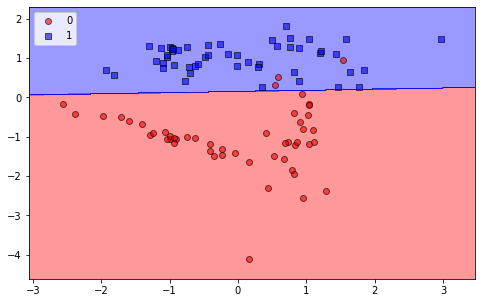

In [79]:
# 결정 평면 plot
draw_decision(model, X, y)